In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from funcionario import euler_npts

# Explorando a EDO com mais gráficos

Continuamos com a EDO: $y' = 2y$.

In [3]:
def F(t,y):
    return 2*y

def ansF(t,t0,y0): return np.exp(2*(t-t0))*y0

## Relembrando o gráfico que havíamos feito

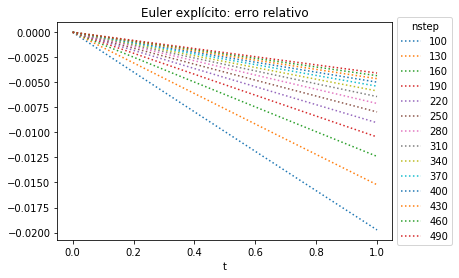

In [4]:
ns = np.arange(100,500,step=30)
for n in ns:
    ts, ys = euler_npts(F, [0,1], y0=1.2, npts=n, retpts=True)
    plt.plot(ts, ys/ansF(ts,0,1.2) - 1, ':', label=str(n))

plt.xlabel('t')
plt.legend(title='nstep', bbox_to_anchor=(1,0.5), loc='center left')
plt.title('Euler explícito: erro relativo')
plt.show()

## Erro da solução em $t = 1$

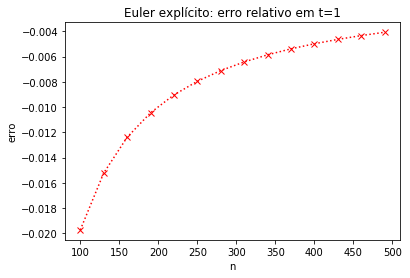

In [31]:
# Copiar, modificar
ns = np.arange(100,500,step=30)
v_finais = []
for n in ns:
    ts, ys = euler_npts(F, [0,1], y0=1.2, npts=n, retpts=True)
    v_finais.append(ys[-1]/ansF(1,0,1.2) - 1)

#plt.plot(ns, v_finais)    
plt.plot(ns, v_finais, 'rx:')    #argumento para estilo da linha
plt.xlabel('n')
plt.ylabel('erro')
#plt.legend(title='nstep', bbox_to_anchor=(1,0.5), loc='center left')
plt.title('Euler explícito: erro relativo em t=1')
plt.show()


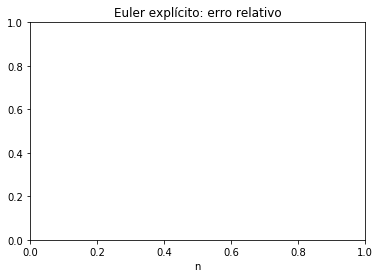

In [32]:
# Novo plot
### Resposta aqui

plt.xlabel('n')
plt.title('Euler explícito: erro relativo')
plt.show()

## Mudando a escala

Vimos que o erro parece tender a zero, conforme $n$ aumenta.
Ao mudar a escala, talvez tenhamos uma ideia melhor de **como** ele tende a zero:

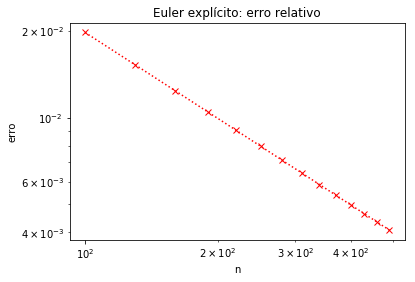

In [38]:
### Resposta aqui

# Copiar, modificar
ns = np.arange(100,500,step=30)
v_finais = []
for n in ns:
    ts, ys = euler_npts(F, [0,1], y0=1.2, npts=n, retpts=True)
    v_finais.append(ys[-1]/ansF(1,0,1.2) - 1)

#plt.plot(ns, v_finais)    
plt.loglog(ns, np.abs(v_finais), 'rx:')    #argumento para estilo da linha #Colocar em módulo
plt.xlabel('n')
plt.ylabel('erro')
#plt.legend(title='nstep', bbox_to_anchor=(1,0.5), loc='center left')
plt.title('Euler explícito: erro relativo')
plt.show()

O que o gráfico acima sugere?  Como escrever matematicamente esta relação "linear"?

Existe uma relação linear entre o erro e n
Neste caso é o logaritmo de cada
log |err| = linear log|n|
log |err| = A * log|n| + B

no eixo X multiplicamos por 5, assim como no y
pois
4*10^-3 * 5 = 20*10^-3 = 2*10^-2
logo, A = -1

B se calcula substituindo valores

log 2*10^-2 = -log100 + B
log 2 ≃ B


calculando o erro

log |err| = -log|n|+log 2
|err| ≃ 2/n

## Mudando os dados, depois de mudar a escala

A escala logarítmica sugere que os pontos $n$ poderiam estar em P.G. (ao tirar o $\log$, ficariam igualmente espaçados).
A função `np.logspace()` faz isso:

[   10    21    46   100   215   464  1000  2154  4641 10000]


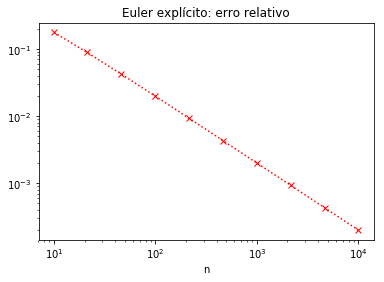

In [66]:
# Copiar, modificar
ns = np.logspace(1,4,num=10,dtype=int)
print (ns)
### Resposta aqui
v_finais = []
for n in ns:
    ts, ys = euler_npts(F, [0,1], y0=1.2, npts=n, retpts=True)
    v_finais.append(ys[-1]/ansF(1,0,1.2) - 1)

plt.loglog(ns, np.abs(v_finais), 'rx:')    #argumento para estilo da linha #Colocar em módulo
plt.xlabel('n')
plt.title('Euler explícito: erro relativo')
plt.show()

Agora, estamos observando o comportamento "linear" para $n$ variando muito mais do que anteriormente,
o que reforça a nossa confiança na taxa de decaimento do erro que vimos acima.

## Não é toda escala que serve:

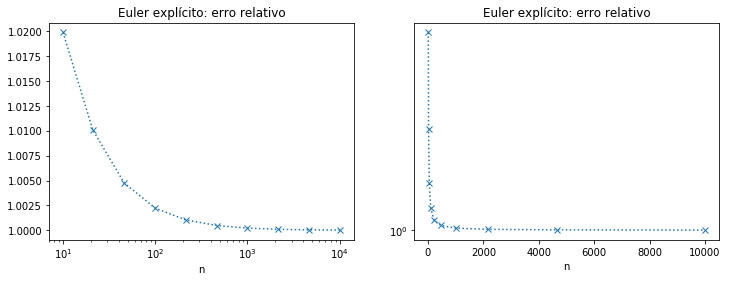

In [59]:
_, [ax1,ax2] = plt.subplots(ncols=2, figsize=(12,4))

ax1.semilogx(ns, np.abs(v_finais/ansF(1,0,1.2) - 1), 'x:')
ax1.set_xlabel('n')
ax1.set_title('Euler explícito: erro relativo')

ax2.semilogy(ns, np.abs(v_finais/ansF(1,0,1.2) - 1), 'x:')
ax2.set_xlabel('n')
ax2.set_title('Euler explícito: erro relativo')

plt.show()

## Voltando ao gráfico original

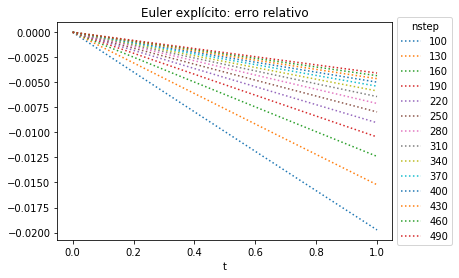

In [68]:
ns = np.arange(100,500,step=30)
for n in ns:
    ts, ys = euler_npts(F, [0,1], y0=1.2, npts=n, retpts=True)
    plt.plot(ts, ys/ansF(ts,0,1.2) - 1, ':', label=str(n))

plt.xlabel('t')
plt.legend(title='nstep', bbox_to_anchor=(1,0.5), loc='center left')
plt.title('Euler explícito: erro relativo')
plt.show()

Vejamos como o uso de $n$ em P.G., e uma escala logarítmica, podem ajudar o gráfico:

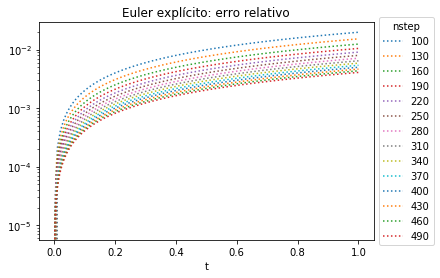

In [69]:
# Não adianta usar apenas escala log
ns = np.arange(100,500,step=30)
for n in ns:
    ts, ys = euler_npts(F, [0,1], y0=1.2, npts=n, retpts=True)
    plt.semilogy(ts, np.abs(ys/ansF(ts,0,1.2) - 1), ':', label=str(n))
    # np.abs()

plt.xlabel('t')
plt.legend(title='nstep', bbox_to_anchor=(1,0.5), loc='center left')
plt.title('Euler explícito: erro relativo')
plt.show()

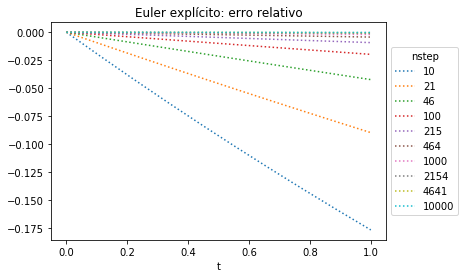

In [70]:
# Nem apenas os ns em PG
ns = np.logspace(1,4,dtype=int, num=10)
for n in ns:
    ts, ys = euler_npts(F, [0,1], y0=1.2, npts=n, retpts=True)
    plt.plot(ts, ys/ansF(ts,0,1.2) - 1, ':', label=str(n))
    # Comentar np.abs

plt.xlabel('t')
plt.legend(title='nstep', bbox_to_anchor=(1,0.5), loc='center left')
plt.title('Euler explícito: erro relativo')
plt.show()

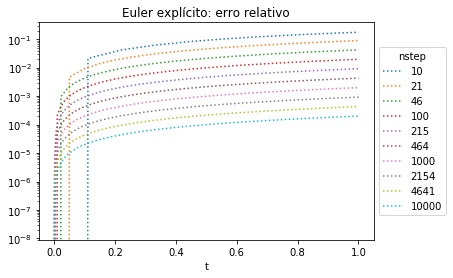

In [71]:
# Mas os dois juntos:
ns = np.logspace(1,4,dtype=int, num=10)
for n in ns:
    ts, ys = euler_npts(F, [0,1], y0=1.2, npts=n, retpts=True)
    plt.semilogy(ts, np.abs(ys/ansF(ts,0,1.2) - 1), ':', label=str(n))

plt.xlabel('t')
plt.legend(title='nstep', bbox_to_anchor=(1,0.5), loc='center left')
plt.title('Euler explícito: erro relativo')
plt.show()

# Fazendo gráficos juntos, para ver "tudo"

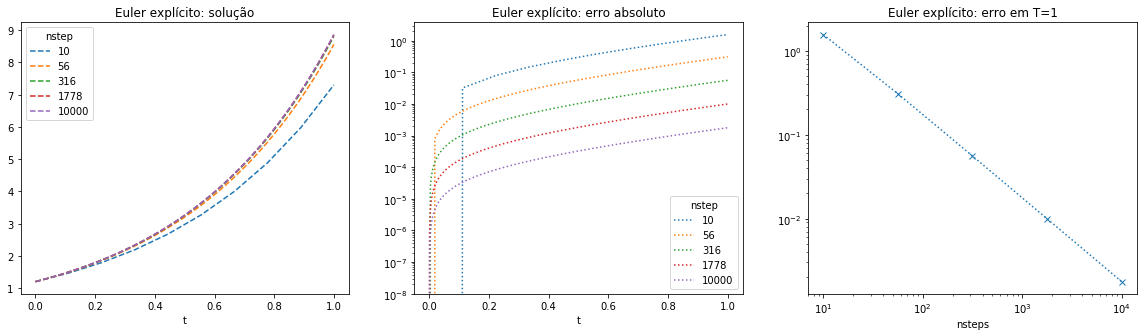

In [83]:
_, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(20,5))

ns = np.logspace(1,4,num=5,dtype=int)
v_finais = []
for n in ns:
    ts, ys = euler_npts(F, [0,1], y0=1.2, npts=n, retpts=True)
    ax1.plot(ts, ys, '--', label=str(n))
    ax2.semilogy(ts, np.abs(ys - ansF(ts,0,1.2)), ':', label=str(n))
    v_finais.append(ys[-1])

for a in [ax1, ax2]:
    a.set_xlabel('t')
    a.legend(title='nstep')

ax1.set_title('Euler explícito: solução')
ax2.set_title('Euler explícito: erro absoluto')

ax3.loglog(ns, np.abs(v_finais - ansF(1,0,1.2)), 'x:')
ax3.set_title('Euler explícito: erro em T=1')
ax3.set_xlabel('nsteps')
plt.show()

# Agora, faça para outras equações!

- Quais EDOs você pode resolver numericamente?
- De quais EDOs você conhece a solução, para calcular o erro?

In [79]:
def G(t,y):
    a=0
    ### Resposta aqui


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

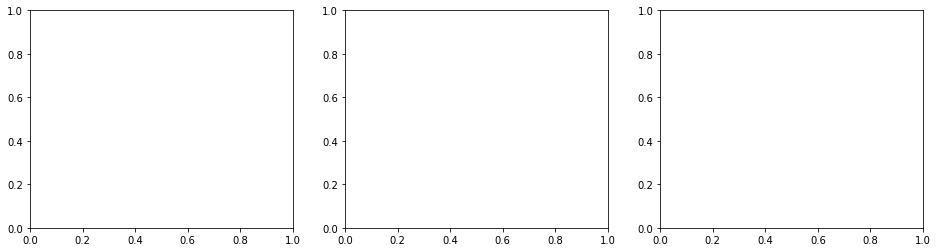

In [80]:
_, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(16,4))

ns = np.logspace(3,6,num=5,base=2,dtype=int)
for n in ns:
    ts, ys = euler_npts(G, [1,4], y0=1.2, npts=n, retpts=True)
    ax1.plot(ts, ys, '--', label=str(n))
    ax2.semilogy(ts, np.abs(ys - ansG(ts,1,1.2)), ':', label=str(n))
    ax3.semilogy(ts, np.abs(1 - ys/ansG(ts,1,1.2)), ':', label=str(n))

ax1.plot(ts, ansG(ts,1,1.2))
for a in [ax1, ax2, ax3]:
    a.set_xlabel('t')
    a.legend(title='nstep', loc=4)

ax1.set_title('Euler explícito: solução')
ax2.set_title('Euler explícito: erro absoluto')
ax3.set_title('Euler explícito: erro relativo')
plt.show()